In [1]:
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import os

fitn7 = os.path.join('..', 'data', 'glg_tte_n7_bn090926181_v00.fit')
fitn3 = os.path.join('..', 'data', 'glg_tte_n3_bn090926181_v00.fit')

tte7 = TTE.open(fitn7)
tte3 = TTE.open(fitn3)
phaii7 = tte7.to_phaii(bin_by_time, 1.024, time_ref=0.0)
phaii3 = tte3.to_phaii(bin_by_time, 1.024, time_ref=0.0)

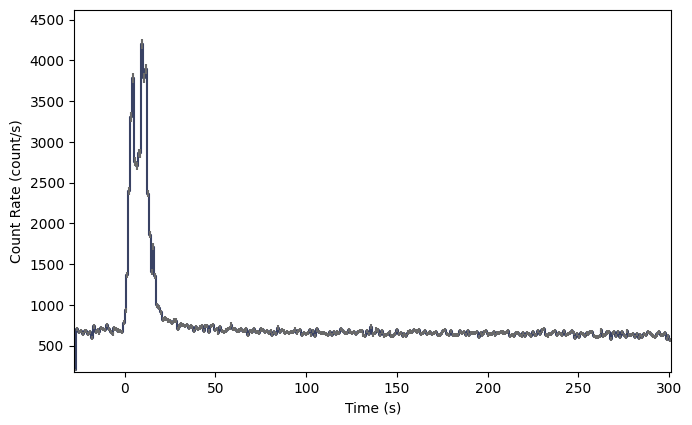

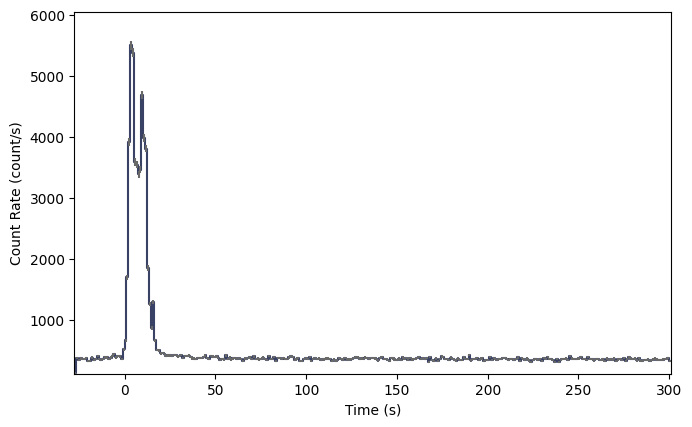

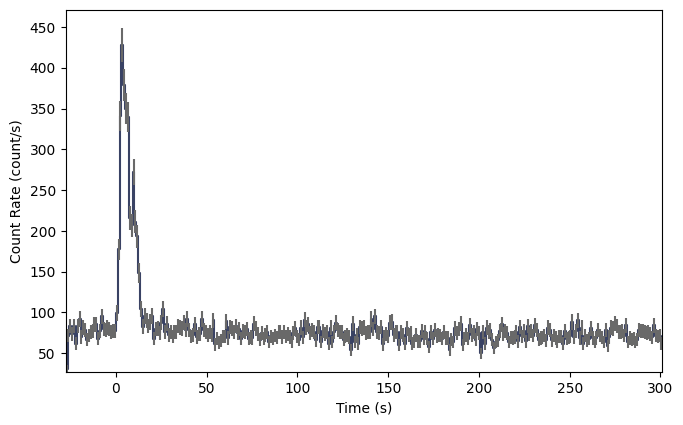

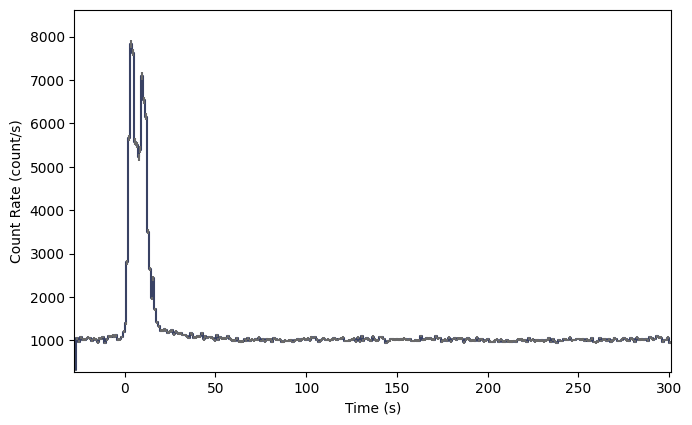

In [2]:
%matplotlib inline
from gbm.plot import Lightcurve

erange = (8.0, 900.0)
erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

lc_data1_n7 = phaii7.to_lightcurve(energy_range=erange1)
lcplot1_n7 = Lightcurve(data=lc_data1_n7)

lc_data2_n7 = phaii7.to_lightcurve(energy_range=erange2)
lcplot2_n7 = Lightcurve(data=lc_data2_n7)

lc_data3_n7 = phaii7.to_lightcurve(energy_range=erange3)
lcplot3_n7 = Lightcurve(data=lc_data3_n7)

lc_data1_n3 = phaii3.to_lightcurve(energy_range=erange)
lcplot1_n3 = Lightcurve(data=lc_data1_n3)

In [3]:
from gbm.data import Cspec, GbmDetectorCollection

test_pha_n7 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.pha')
test_pha_n3 = os.path.join('..', 'data', 'glg_cspec_n3_bn090926181_v00.pha')
n7 = Cspec.open(test_pha_n7)
n3 = Cspec.open(test_pha_n3)

cspecs = GbmDetectorCollection.from_list([n7, n3])

In [4]:
view_range = (-10.0, 100.0)
bkgd_range = [(-20., -5.), (45., 100.)]
src_range = (10.0, 13.0)

In [5]:
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

backfitters = [BackgroundFitter.from_phaii(cspec, Polynomial, time_ranges=bkgd_range) for cspec in cspecs]
backfitters = GbmDetectorCollection.from_list(backfitters, dets=cspecs.detector())

backfitters.fit(order=1)

bkgds = backfitters.interpolate_bins(cspecs.data()[0].tstart, cspecs.data()[0].tstop)
bkgds = GbmDetectorCollection.from_list(bkgds, dets=cspecs.detector())

In [6]:
# the lightcurves
data_lcs1 = cspecs.to_lightcurve(energy_range=erange1)
data_lcs2 = cspecs.to_lightcurve(energy_range=erange2)
data_lcs3 = cspecs.to_lightcurve(energy_range=erange3)
# the energy-integrated background
bkgd_lcs1 = bkgds.integrate_energy(*erange1)
bkgd_lcs2 = bkgds.integrate_energy(*erange2)
bkgd_lcs3 = bkgds.integrate_energy(*erange3)
# the source time selection
src_lcs1 = cspecs.to_lightcurve(time_range=src_range, energy_range=erange1)
src_lcs2 = cspecs.to_lightcurve(time_range=src_range, energy_range=erange2)
src_lcs3 = cspecs.to_lightcurve(time_range=src_range, energy_range=erange3)

# the count spectrum
data_specs = cspecs.to_spectrum(time_range=src_range)
# the time-integrated background
bkgd_specs = bkgds.integrate_time(*src_range)
# the energy selection
src_specs1 = cspecs.to_spectrum(time_range=src_range, energy_range=erange1)
src_specs2 = cspecs.to_spectrum(time_range=src_range, energy_range=erange2)
src_specs3 = cspecs.to_spectrum(time_range=src_range, energy_range=erange3)

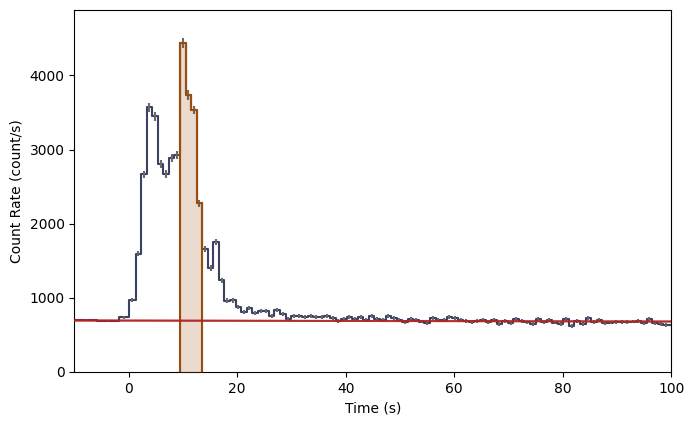

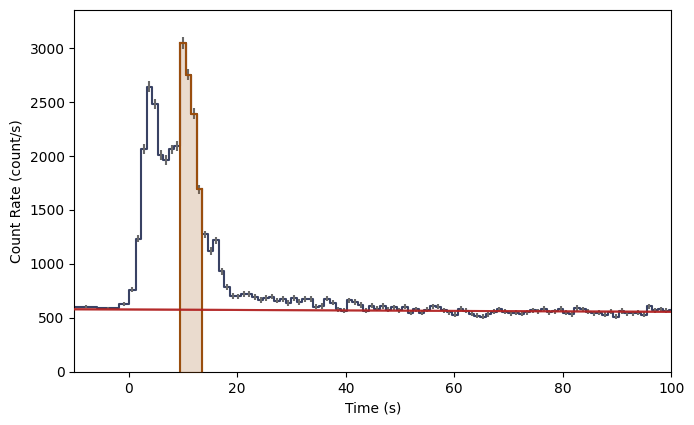

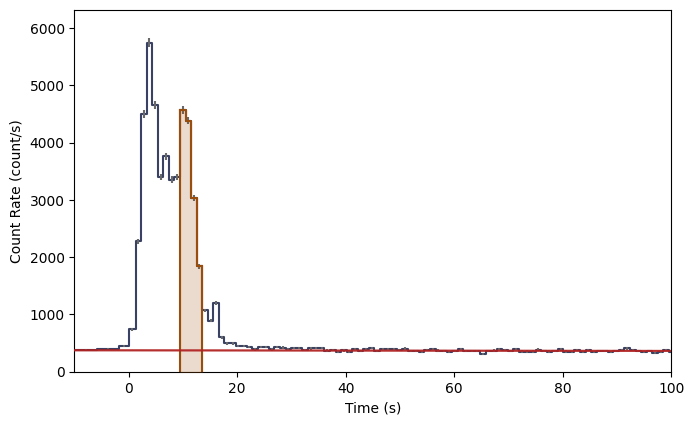

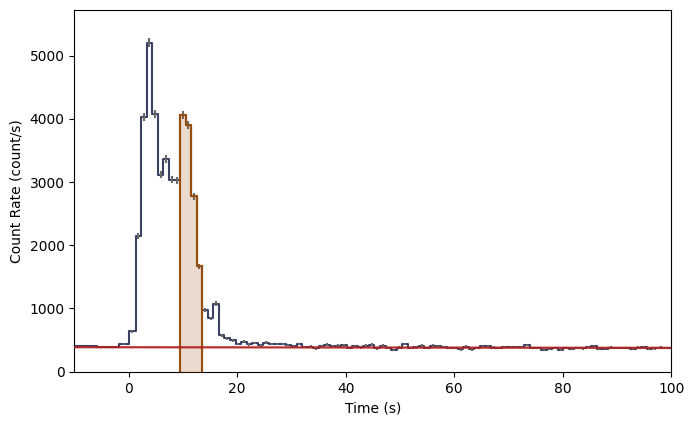

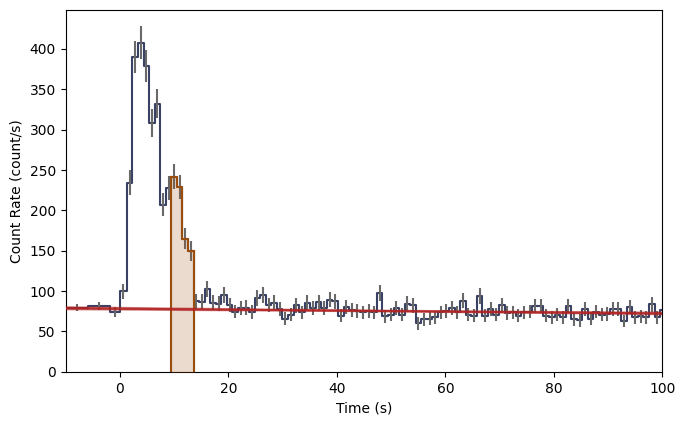

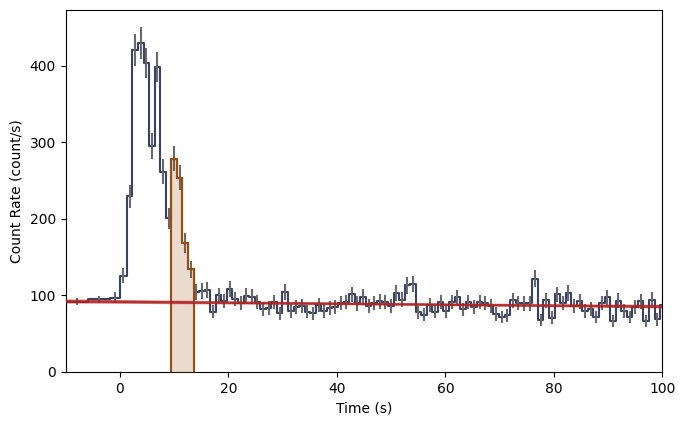

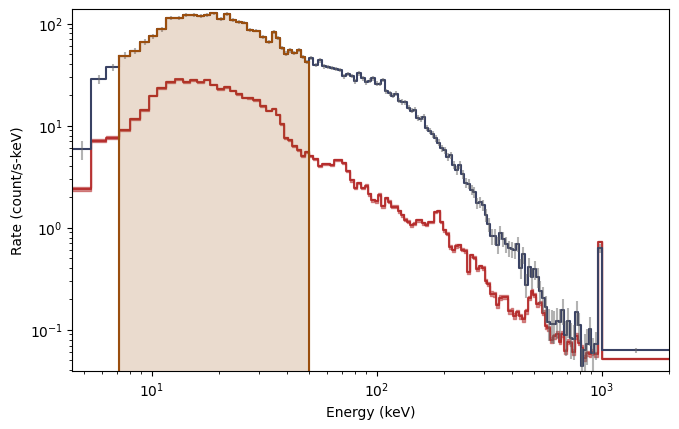

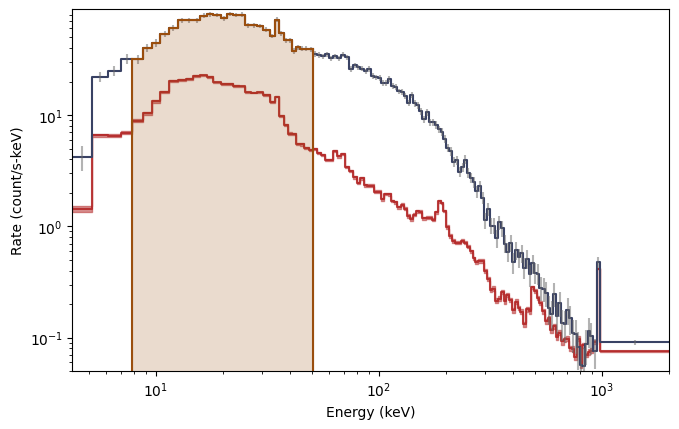

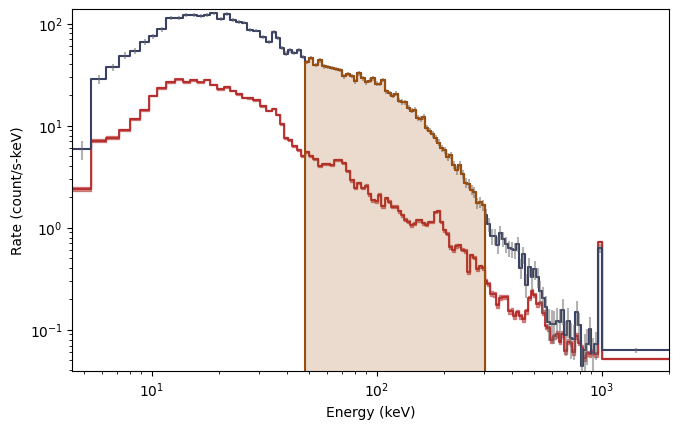

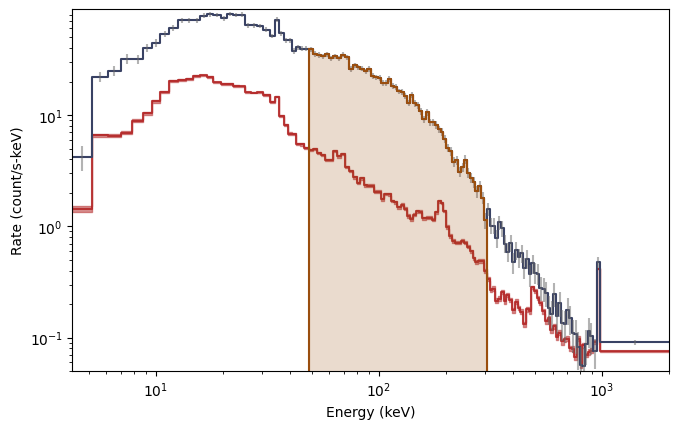

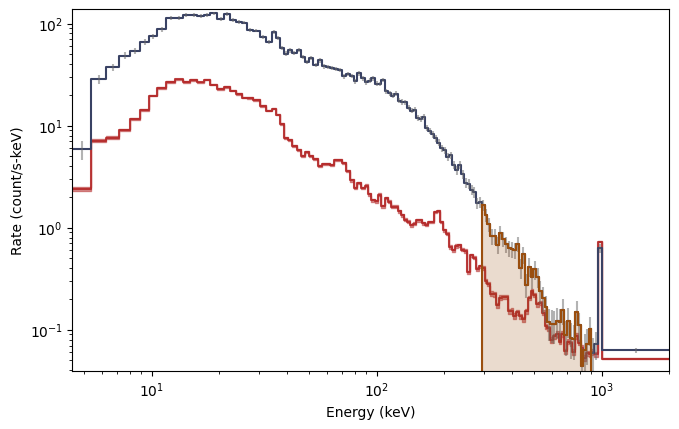

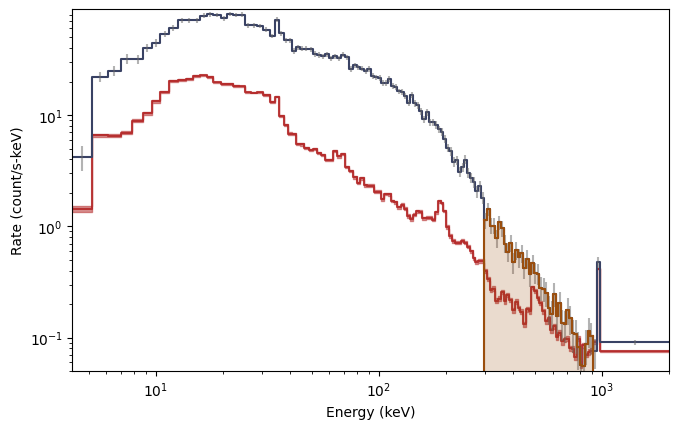

In [7]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

# Plot the lightcurves with the selections and background fit
lcplots1 = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs1, bkgd_lcs1)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots1, src_lcs1)]
lcplots2 = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs2, bkgd_lcs2)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots2, src_lcs2)]
lcplots3 = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs3, bkgd_lcs3)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots3, src_lcs3)]
# zoom in
for lcplot in lcplots1 + lcplots2 + lcplots3:
    lcplot.xlim = view_range
 
# Plot the spectra with the selections and background fit
specplots1 = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots1, src_specs1)]
specplots2 = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots2, src_specs2)]
specplots3 = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots3, src_specs3)]

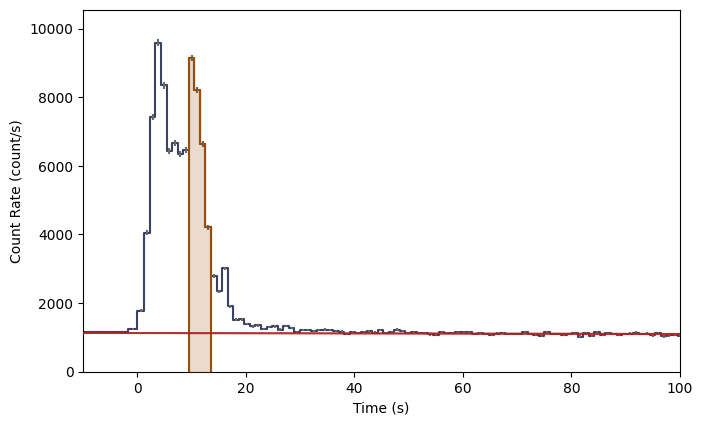

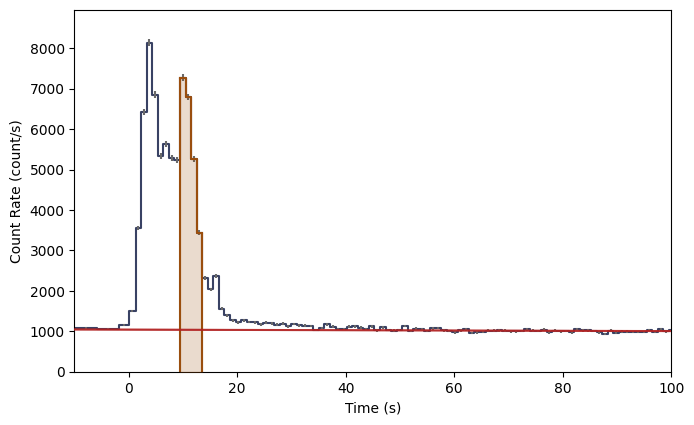

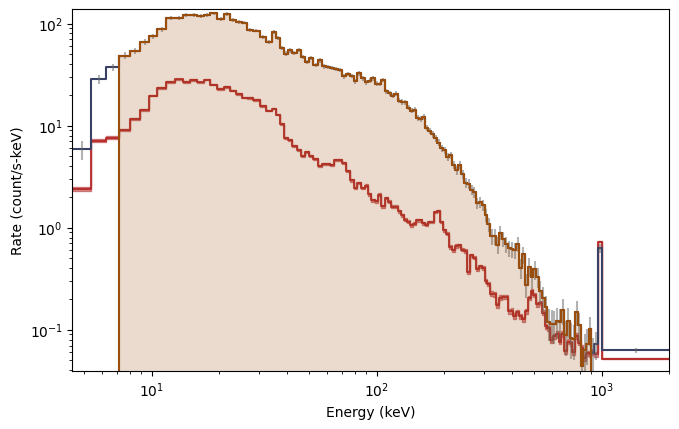

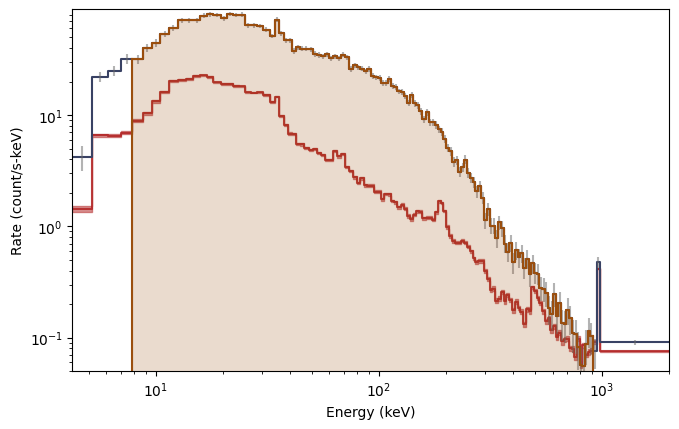

In [8]:
# the lightcurves
data_lcs = cspecs.to_lightcurve(energy_range=erange)
# the energy-integrated background
bkgd_lcs = bkgds.integrate_energy(*erange)
# the source time selection
src_lcs = cspecs.to_lightcurve(time_range=src_range, energy_range=erange)

# the count spectrum
data_specs = cspecs.to_spectrum(time_range=src_range)
# the time-integrated background
bkgd_specs = bkgds.integrate_time(*src_range)
# the energy selection
src_specs = cspecs.to_spectrum(time_range=src_range, energy_range=erange)

# Plot the lightcurves with the selections and background fit
lcplots = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs, bkgd_lcs)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots, src_lcs)]
# zoom in
for lcplot in lcplots:
    lcplot.xlim = view_range
 
# Plot the spectra with the selections and background fit
specplots = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots, src_specs)]

In [29]:
from gbm.spectra.fitting import SpectralFitterPgstat
from gbm.data import RSP
from gbm.spectra.functions import PowerLaw, Comptonized, Band, BlackBody

phas = cspecs.to_pha(time_ranges=src_range, energy_range=erange)

rsp_dir_n7 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.rsp2')
rsp_dir_n3 = os.path.join('..', 'data', 'glg_cspec_n3_bn090926181_v00.rsp2')

# open responses
rsp1 = RSP.open(rsp_dir_n7)
rsp2 = RSP.open(rsp_dir_n3)
rsps = GbmDetectorCollection.from_list([rsp1, rsp2])

# and interpolate response files to get DRMs at center of the source window
rsps_interp = [rsp.interpolate(pha.tcent) for rsp, pha in zip(rsps, phas)]

# we initialize with our PHAs, backgrounds, and responses:
specfitter = SpectralFitterPgstat(phas, bkgds.to_list(), rsps.to_list(), method='TNC')

blackbody = BlackBody()
specfitter.fit(blackbody, options={'maxiter': 600})
print("BlackBody Fit:")
print(specfitter.message)
print('Parameters: {}'.format(specfitter.parameters))
print('Pgstat/DoF: {}/{}'.format(specfitter.statistic, specfitter.dof))

band = Band()
band.param_list

print('Band:')
print(band.default_values)
print(band.min_values)
print(band.max_values)

BlackBody Fit:
Converged (|x_n-x_(n-1)| ~= 0)
Parameters: [6.75299692e-04 2.99887814e+01]
Pgstat/DoF: 4583.973569990007/240
Band:
[0.01, 500.0, -0.5, -2.5, 100.0]
[1e-10, 0.01, -1.9, -10.0, 0.01]
[inf, inf, 20.0, -2.0001, inf]


/home/reegh/Documentos/Astro/Astro-GRBs/gbm/lib/python3.10/site-packages/gbm/spectra/functions.py:903: RuntimeWarning: overflow encountered in exp
  fxn = A * x ** 2 / (np.exp(x / kT) - 1.0)


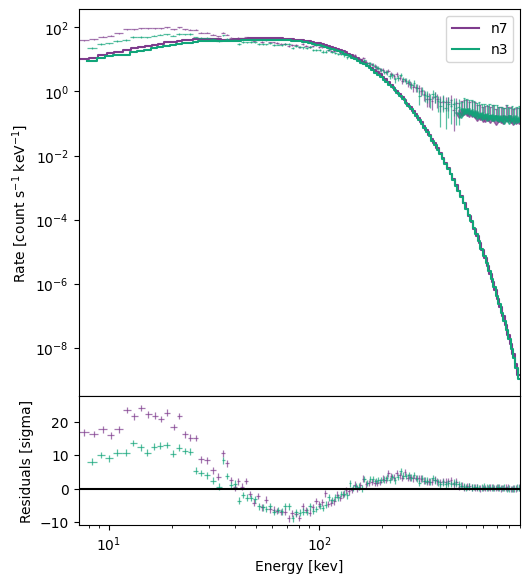

In [30]:
from gbm.plot import ModelFit
import numpy as np

if not hasattr(np, 'VisibleDeprecationWarning'):
    # Mapear a DeprecationWarning para compatibilidad con paquetes que lo esperan
    np.VisibleDeprecationWarning = DeprecationWarning

# initialize with your spectral fitter once the fit is done
modelplot = ModelFit(fitter=specfitter)

In [11]:
print('Band Fit:')
specfitter.fit(band, options={'maxiter': 1000})

# After the fit has converged, we can query the fitter for lots of info, including the parameters that
# satisfy the maximum likelihood as well as the parameter uncertainties resulting from -2(Delta)LogLike
print(specfitter.message)
print('Parameters: {}'.format(specfitter.parameters))
print('90% Asymm. Errors:\n {}'.format(specfitter.asymmetric_errors(cl=0.9)))
print('Pgstat/DoF: {}/{}'.format(specfitter.statistic, specfitter.dof))

Band Fit:
Converged (|f_n-f_(n-1)| ~= 0)
Parameters: [ 2.40084148e-01  2.54878724e+02 -8.57955066e-01 -9.99997338e+00]
90% Asymm. Errors:
 [[3.53047063e-03 3.54567216e-03]
 [6.40035465e+00 6.58698887e+00]
 [1.53022950e-02 1.54335976e-02]
 [2.66187161e-05 7.19231809e+00]]
Pgstat/DoF: 243.57315329492866/238


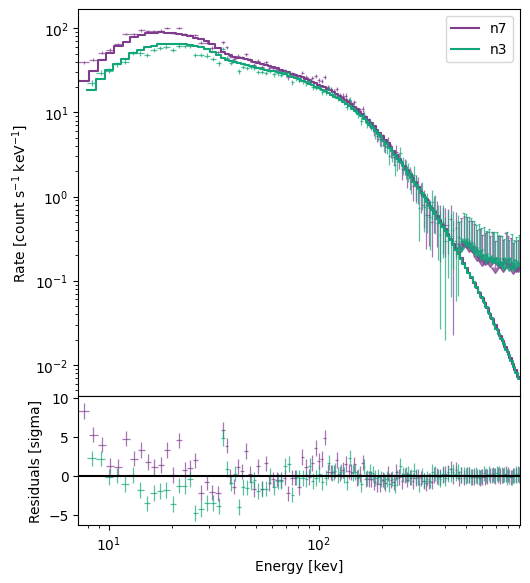

In [12]:
from gbm.plot import ModelFit
import numpy as np

if not hasattr(np, 'VisibleDeprecationWarning'):
    # Mapear a DeprecationWarning para compatibilidad con paquetes que lo esperan
    np.VisibleDeprecationWarning = DeprecationWarning

# initialize with your spectral fitter once the fit is done
modelplot = ModelFit(fitter=specfitter)

/home/reegh/Documentos/Astro/Astro-GRBs/gbm/lib/python3.10/site-packages/gbm/spectra/fitting.py:600: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = multivariate_normal(self.parameters, self.covariance,


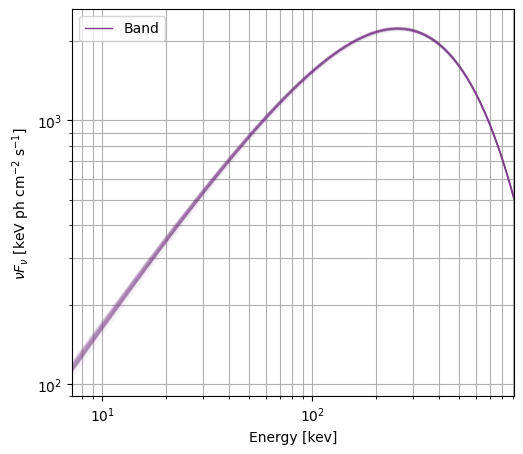

In [13]:
import matplotlib.legend as mlegend

if not hasattr(mlegend.Legend, 'legendHandles'):
    def _get_legendHandles(self):
        # devolver el atributo nuevo si existe, sino intentar variantes, sino lista vacía
        return getattr(self, 'legend_handles', getattr(self, '_legend_handles', []))
    mlegend.Legend.legendHandles = property(_get_legendHandles)

modelplot = ModelFit(fitter=specfitter, view='nufnu')
modelplot.ax.grid(which='both')

In [20]:
# flux over 10-1000 keV
photon_flux = band.integrate(specfitter.parameters, (10.0, 1000.0)) # photons/s/cm^2
energy_flux = band.integrate(specfitter.parameters, (10.0, 1000.0), energy=True) # erg/s/cm^2
photon_flux, energy_flux

# we've defined a new model that is the sum of a Comptonized function and a power law
comp_pl = Comptonized() + PowerLaw()

# rerun the fit
print('Comp+PL Fit:')
specfitter.fit(comp_pl, options= {'maxiter': 800})

print(specfitter.message)
print('Parameters: {}'.format(specfitter.parameters))
print('Pgstat/DoF: {}/{}'.format(specfitter.statistic, specfitter.dof))

Comp+PL Fit:
Max. number of function evaluations reached
Parameters: [ 3.08261308e-01  1.94640785e+02 -1.79849041e-01  3.79718491e-02
 -1.63050032e+00]
Pgstat/DoF: 214.46995338120098/237


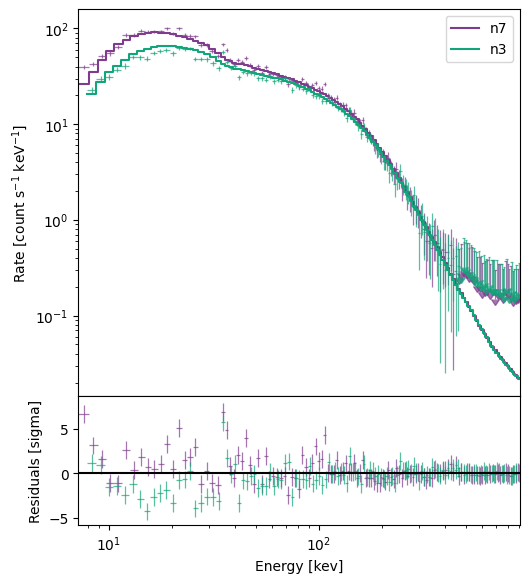

In [15]:
modelplot = ModelFit(fitter=specfitter)

/home/reegh/Documentos/Astro/Astro-GRBs/gbm/lib/python3.10/site-packages/gbm/spectra/fitting.py:600: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = multivariate_normal(self.parameters, self.covariance,


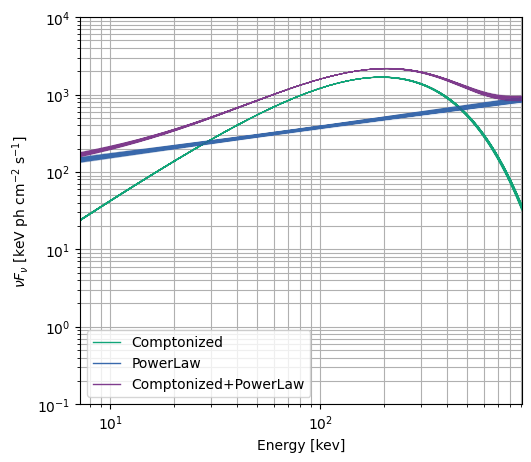

In [16]:
modelplot = ModelFit(fitter=specfitter)
# plot 1000 samples instead of the default 100
modelplot.nufnu_spectrum(num_samples=1000)
modelplot.ylim = (0.1, 10000.0)
modelplot.ax.grid(which='both')

In [17]:
specfitter.save('./my_fit.npz')